<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-2/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-2

LP-1

There are two semi circles of width thk with inner radius rad, separated by sep (red is -1 and blue is + 1) . The center of the top semi-circle is aligned with the middle of the edge of the bottom semi-circle. This task is linearly separable when sep >= 0, and not so for sep < 0 . Set rad = 10, thk = 5 a n d sep = 5 . Then, generate 2000 examples uniformly, which means you will have approximately 1,000 examples for each class.

(a) Run the P LA starting from w = 0 until it converges. Plot the data and the final hypothesis.

(b) Repeat part (a) using the linear regression (for classification) to obtain w. Explain your observations.

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


In [40]:
#### CREDITS: Wencen Wu ####

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      2000 non-null   int64  
 1   x1      2000 non-null   float64
 2   x2      2000 non-null   float64
 3   y       2000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 62.6 KB
      x0         x1         x2    y
0      1  -7.837928  10.502383  1.0
1      1 -12.092127   8.388953  1.0
2      1   0.056101  10.451668  1.0
3      1 -10.367478   5.768884  1.0
4      1  -9.559169   4.161215  1.0
...   ..        ...        ...  ...
1995   1  17.563602 -15.124516 -1.0
1996   1  24.927326  -5.241865 -1.0
1997   1   5.763881 -15.994844 -1.0
1998   1   1.472052 -10.445207 -1.0
1999   1   1.717795  -5.046699 -1.0

[2000 rows x 4 columns]


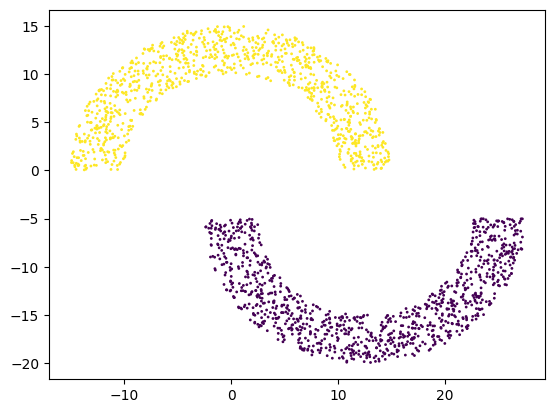

In [41]:

N=2000
top,bottom = generatedata(rad,thk,sep,N)

# Create DataFrame
df = pd.DataFrame({'x0': [1] * len(top + bottom),
                   'x1': [point[0] for point in top + bottom],
                   'x2': [point[1] for point in top + bottom],
                   'y': [1.0] * len(top) + [-1.0] * len(bottom)})

df.info()
print(df)

# Visualize the data
plt.scatter(df['x1'], df['x2'], c=df['y'], s=1)
plt.show()


In [42]:

def linear_regression(X, y):
    XT = np.transpose(X)
    x_pseudo_inv = np.matmul(np.linalg.inv(np.matmul(XT,X)), XT)
    w = np.matmul(x_pseudo_inv,y)
    return w


def perceptron(points, dim=2, max_it=1000, use_adaline=False,
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break

    rou = math.inf
    R = 0
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
        if prod < rou:
            rou = prod
        abs_x = np.linalg.norm(x)
        if abs_x > R:
            R = abs_x
    theoretical_t = (R**2) * (np.linalg.norm(w)**2)/rou/rou #LFD problem 1.3
    #w = w/w[-1]
    if print_out:
        print('Final correctness: ', c, '. Total iteration: ', it)
        print('Final w:', w)
    return w, it, theoretical_t



def plot_data_hypothesis(df, xs, hypotheses, des_s):
    positives = df.loc[df['y']==1]
    negatives = df.loc[df['y']==-1]

    figsize = plt.figaspect(1)
    f, ax = plt.subplots(1, 1, figsize=figsize)

    ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='.', c= 'b', label='+1 labels')
    ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'.', c= 'r', label='-1 labels')

    labels = []
    for g, des in zip(hypotheses, des_s):
        label = 'Hypothesis: ' + des
        labels.append(label)
        norm_g = g/g[-1]
        hypothesis = ax.plot(xs, -(norm_g[0]+norm_g[1]*xs), label=label)

    ax.set_ylabel(r"$x_2$", fontsize=11)
    ax.set_xlabel(r"$x_1$", fontsize=11)
    ax.axis('tight')
    legend_x = 2.0
    legend_y = 0.5
    ax.legend(['+1 labels', '-1 labels'] + labels,
              loc='center right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

Number of positive points:  957
Number of negatives points:  1043
Final correctness:  2000 . Total iteration:  20
Final w: [20.         -1.79067078 46.96195178]
Liner regression coefficients:  [ 0.25641813 -0.01025466  0.07723984]


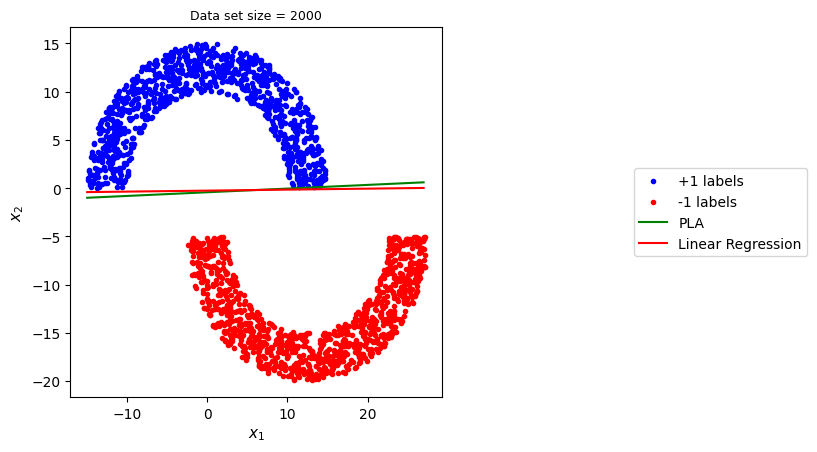

In [43]:
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='.', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'.', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

norm_g, num_its, _ = perceptron(df.values, randomize=False, print_out = True)
x1 = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
norm_g = norm_g/norm_g[-1]
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='Final Hypothesis')

w_lin = linear_regression(df[['x0','x1','x2']].values, df['y'].values)
print('Liner regression coefficients: ', w_lin)
linear = ax.plot(x1, -(w_lin[0]+w_lin[1]*x1), c = 'r', label='Linear Regression')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['+1 labels', '-1 labels', 'PLA', 'Linear Regression'],
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
#ax.set_ylim(bottom=lb, top=ub)
plt.show()

LP2

For the double semi-circle task in Problem 3 .1, set sep = -5 and generate 2,000 examples.

(a) What will happen if you run P LA on those examples?

(b) Run the pocket algorithm for 100,000 iterations and plot Ein versus the iteration number t.

(c) Plot the data and the fi n a l hypothesis in part (b).


In [46]:
def pocket_algo(points, dim=2, max_it=100000, eta = 1,
                randomized =True, print_out = True,
                test_points=None):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    if test_points is not None:
        test_xs, test_ys = test_points[:,:dim+1], test_points[:,dim+1]
    num_points = points.shape[0]
    sample_err = math.inf
    test_sample_err = math.inf
    w_ts, what_ts = np.zeros(max_it), np.zeros(max_it)
    test_w_ts, test_what_ts = np.zeros(max_it), np.zeros(max_it)
    wh = w #PLA w
    for it in range(max_it):
        idxs = np.arange(num_points)
        if randomized:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)

        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(wh.T, x)
            prod = st*y
            if prod <= 0:
                wh = wh + eta *y*x
                break

        in_sample_err = calc_error(wh, xs, ys)
        if test_points is not None:
            test_sample_err_it = calc_error(wh, test_xs, test_ys)
            test_w_ts[it] = test_sample_err_it

        w_ts[it] = in_sample_err

        if in_sample_err < sample_err:
            w = wh
            sample_err = in_sample_err
            what_ts[it] = sample_err
            if test_points is not None:
                test_sample_err = test_sample_err_it
            test_what_ts[it] = test_sample_err
        else:
            what_ts[it] = sample_err
            test_what_ts[it] = test_sample_err

    w = w/w[-1]
    if print_out:
        print('final Error Rate: ', sample_err)
        print('final normalized w:', w)
    return w, w_ts, what_ts, test_w_ts, test_what_ts, sample_err


def calc_error(w, xs, ys):
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod < 0:
            c +=1
    return c/len(ys)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      2000 non-null   int64  
 1   x1      2000 non-null   float64
 2   x2      2000 non-null   float64
 3   y       2000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 62.6 KB
      x0         x1         x2    y
0      1   7.355397  10.782264  1.0
1      1   1.463818  13.323974  1.0
2      1 -11.942647   8.426766  1.0
3      1  -6.681922  11.183960  1.0
4      1  -9.386267   4.397675  1.0
...   ..        ...        ...  ...
1995   1  20.515441  -2.180691 -1.0
1996   1   0.557648  -3.609758 -1.0
1997   1  13.454702  -7.624061 -1.0
1998   1  13.085336  -9.897577 -1.0
1999   1  26.014680  -0.585777 -1.0

[2000 rows x 4 columns]


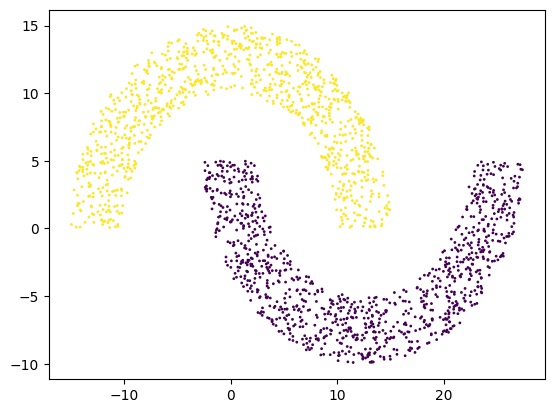

In [47]:
N=2000
rad = 10
thk = 5
sep = -5
top,bottom = generatedata(rad,thk,sep,N)

df = pd.DataFrame({'x0': [1] * len(top + bottom),
                   'x1': [point[0] for point in top + bottom],
                   'x2': [point[1] for point in top + bottom],
                   'y': [1.0] * len(top) + [-1.0] * len(bottom)})

df.info()
print(df)

plt.scatter(df['x1'], df['x2'], c=df['y'], s=1)
plt.show()

Number of positive points:  980
Number of negatives points:  1020
Final correctness:  1694 . Total iteration:  99999
Final w: [ 64.           5.57158265 251.96257376]


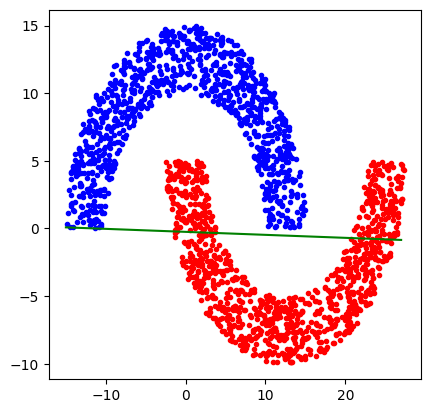

In [49]:
#PLA with 100000 Iteration
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='.', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'.', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

norm_g, num_its, _ = perceptron(df.values, max_it=100000,randomize=False, print_out = True)
x1 = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
norm_g = norm_g/norm_g[-1]
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='Final Hypothesis')
#when sep =-5, the data is no longer linearly separable. So no matter how many iteration we use, we can't find a true final hypothesis

final Error Rate:  0.083
final normalized w: [-1.56829465 -0.13493007  1.        ]


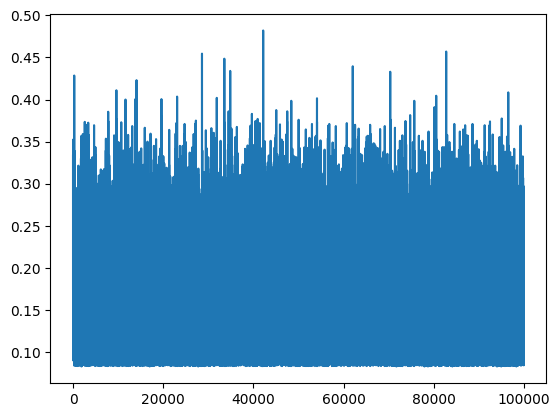

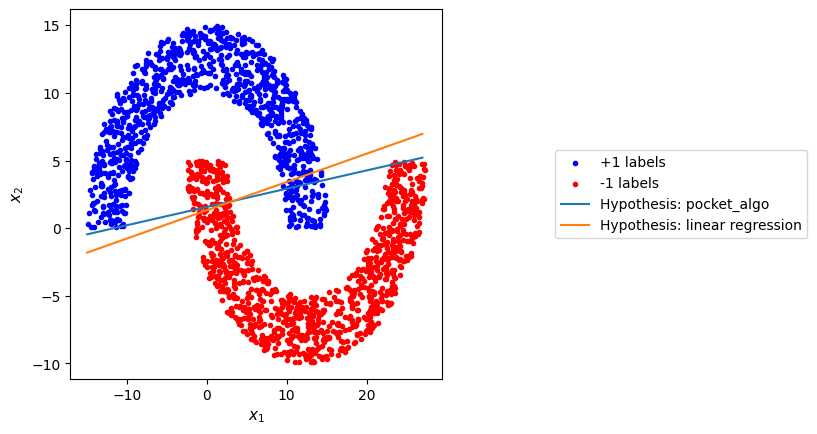

In [48]:
w_pocket, w_ts, what_ts, test_w_ts, test_what_ts, _ = pocket_algo(df.values)

plt.plot(w_ts)

w_lin = linear_regression(df[['x0','x1','x2']].values, df['y'].values)
xs = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
plot_data_hypothesis(df, xs, [w_pocket, w_lin], ['pocket_algo', 'linear regression'])

HP

(d) Use the linear regression algorithm to obtain the weights w and compare this result with the pocket algorithm in terms of computation time and quality of the solution.

(e) Repeat (b) - (d) with a 3rd order polynomial feature transform.

Answer

(d) It takes much longer to run pocket algorithm than linear regression (in this case, about 8-9 minutes for pocket algorithm and less than a second for Linear Regression). This is because at each iteration we need to recompute the in-sample error in pocket algorithm.

final Error Rate:  0.028
final normalized w: [-3.5412686  -3.4974861  -1.78153098  4.11711205  6.18784233 -7.4282773
 -0.34892617  0.27421272 -0.41904396  1.        ]
Pocket algorithm time:  416.5684015750885
Linear Regression time:  0.003145933151245117


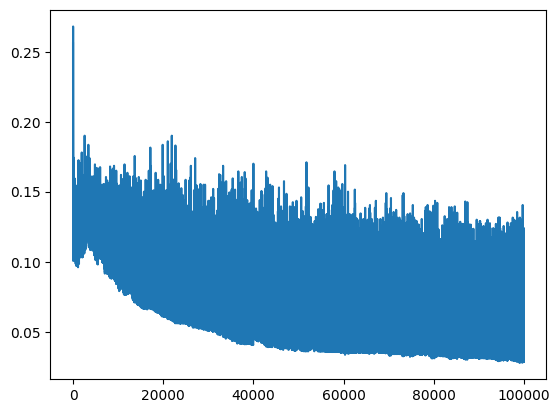

In [51]:
import time


def polynomial_transformation_2v(df):
    df['x1x2'] = df['x1']*df['x2']
    df['x1_sq'] = df['x1']*df['x1']
    df['x2_sq'] = df['x2']*df['x2']
    df['x2x1_sq'] = df['x2']*df['x1_sq']
    df['x1x2_sq'] = df['x1']*df['x2_sq']
    df['x1_cu'] = df['x1_sq']*df['x1']
    df['x2_cu'] = df['x2_sq']*df['x2']
    df = df[['x0','x1','x2',
             'x1x2', 'x1_sq', 'x2_sq',
             'x1x2_sq', 'x2x1_sq', 'x1_cu', 'x2_cu',
             'y']]
    return df

df_poly = polynomial_transformation_2v(df)
dim_poly = 9
start = time.time()
w_pocket, w_ts, what_ts, test_w_ts, test_what_ts, _ = pocket_algo(df_poly.values, dim_poly)
end = time.time()
print("Pocket algorithm time: ", end-start)

plt.plot(w_ts)
start = time.time()
w_lin = linear_regression(df_poly[['x0','x1','x2', 'x1x2', 'x1_sq', 'x2_sq',
                                      'x1x2_sq', 'x2x1_sq', 'x1_cu', 'x2_cu']].values,
                             df_poly['y'].values)
end = time.time()
print("Linear Regression time: ", end-start)
xs = np.arange(-(rad+thk), (rad+thk)+rad + thk/2, 0.1)

In [52]:
def poly3(x2, x1, w):
    return (w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1*x2
            + w[4]*x1**2 + w[5]*x2**2 + w[6]*x1*x2**2
            + w[7]*x2*x1**2 + w[8]*x1**3+w[9]*x2**3
           )

def get_coeffs(w, x1):
    return [w[9],
            w[6]*x1+w[5],
            w[7]*x1**2+w[3]*x1+w[2],
            w[8]*x1**3+w[4]*x1**2+w[1]*x1+w[0]]

def deriv(x2, x1, w):
    return (3*w[9]*x2**2 + w[7]*x1**2+2*w[6]*x1*x2+2*w[5]*x2+w[3]*x1+w[2])

from functools import partial
import scipy.optimize
from scipy.optimize import minimize


def find_poly_roots(xs, w):
    x2s1, x2s2, x2s3, vs = [], [], [], []
    for x in xs:
        coeffs = get_coeffs(w, x)
        roots = np.roots(coeffs)
        r1, r2, r3 = roots
        if np.iscomplex(roots[0]):
            if np.iscomplex(roots[1]):
                r1 = r3
                r2 = r3
            elif np.iscomplex(roots[2]):
                r1 = r2
                r3 = r2
        elif np.iscomplex(roots[1]):
            r2 = r1
            r3 = r1

        x2s1.append(r1)
        x2s2.append(r2)
        x2s3.append(r3)
    return x2s1, x2s2, x2s3

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


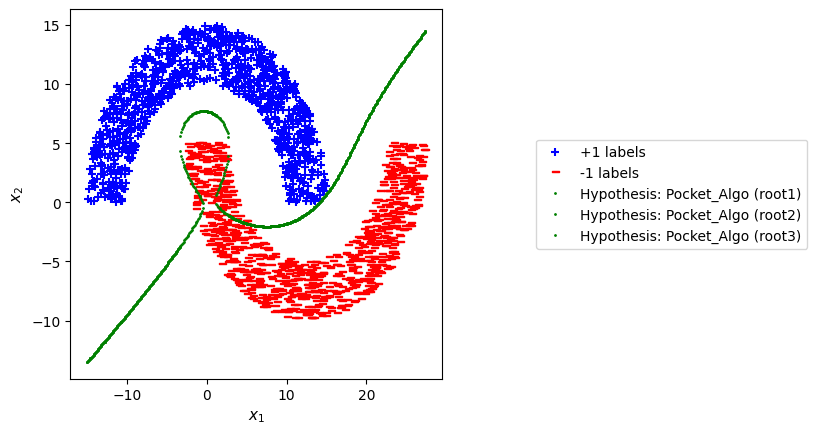

In [53]:
positives = df_poly.loc[df_poly['y']==1]
negatives = df_poly.loc[df_poly['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)
ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')

labels= ['Hypothesis: Pocket_Algo (root1)',
         'Hypothesis: Pocket_Algo (root2)',
         'Hypothesis: Pocket_Algo (root3)']

x2s1, x2s2, x2s3 = find_poly_roots(xs, w_pocket)
hypothesis = ax.plot(xs, x2s1, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s2, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s3, marker='.', markersize='2', color='g', linestyle="")

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
legend_x = 2.0
legend_y = 0.5
ax.legend(['+1 labels', '-1 labels'] + labels,
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


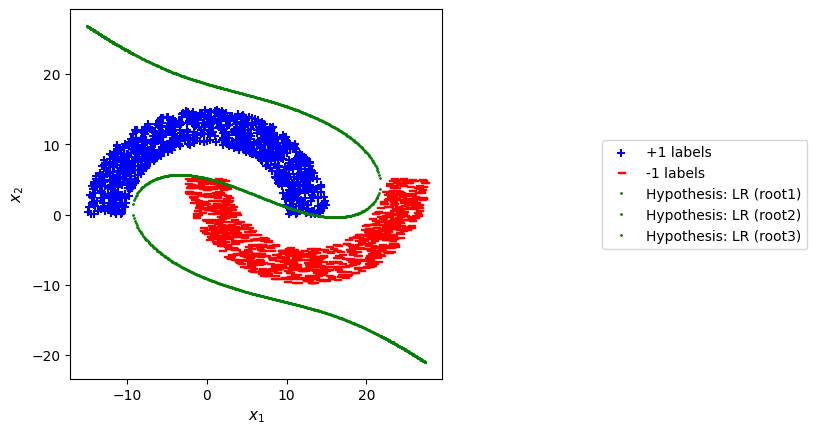

In [54]:
positives = df_poly.loc[df_poly['y']==1]
negatives = df_poly.loc[df_poly['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)
ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')

labels= ['Hypothesis: LR (root1)',
         'Hypothesis: LR (root2)',
         'Hypothesis: LR (root3)']

x2s1, x2s2, x2s3 = find_poly_roots(xs, w_lin)
hypothesis = ax.plot(xs, x2s1, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s2, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s3, marker='.', markersize='2', color='g', linestyle="")

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
#ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['+1 labels', '-1 labels'] + labels,
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()